In [1]:
import pandas as pd
pd.options.display.width = 180
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [2]:
'''import boston dataset'''
boston = datasets.load_boston()

## How is this data imported?

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

The data is given to us in a dicitonary.  Therefore, we can get our data by indexing into it with keys.

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

## Dataset Description

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Create boston DataFrame

In [6]:
column_names = [name.lower() for name in boston.feature_names]
boston_df = pd.DataFrame(data=boston.data, columns=column_names)

In [7]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add target column 
    - MEDV     Median value of owner-occupied homes in $1000's

In [8]:
boston_df['medv'] = boston.target

In [9]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA

### Look at data summary stats

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

We can tell right off the bat the this is a nice and clean dataset.  We have 506 rows with no null values! 

## Scatter Matrix

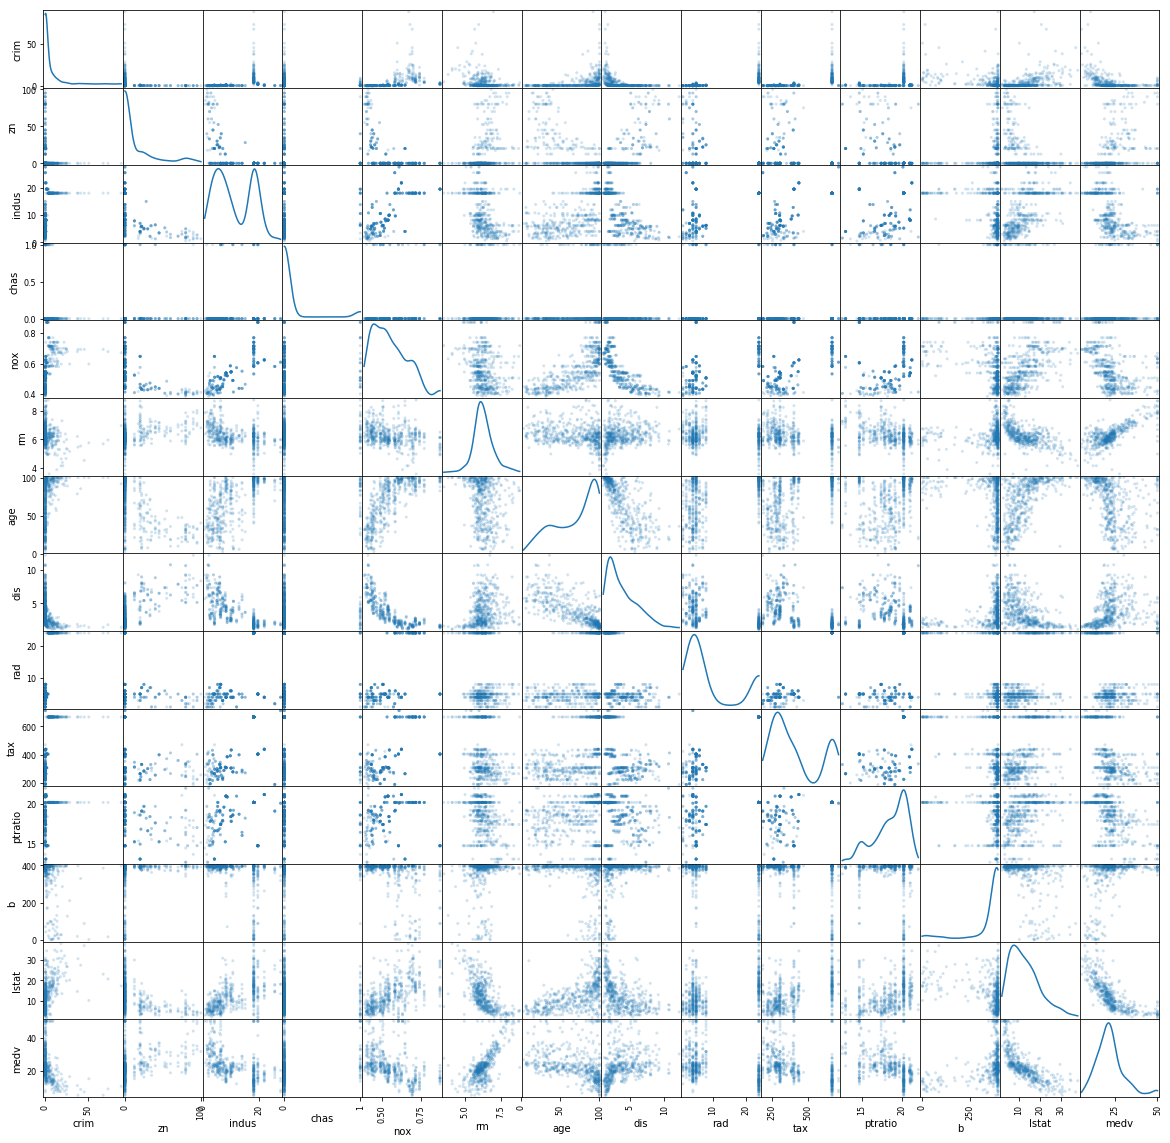

In [13]:
_ = scatter_matrix(boston_df, alpha=0.2, figsize=(20, 20), diagonal='kde')

## Correlation Matrix

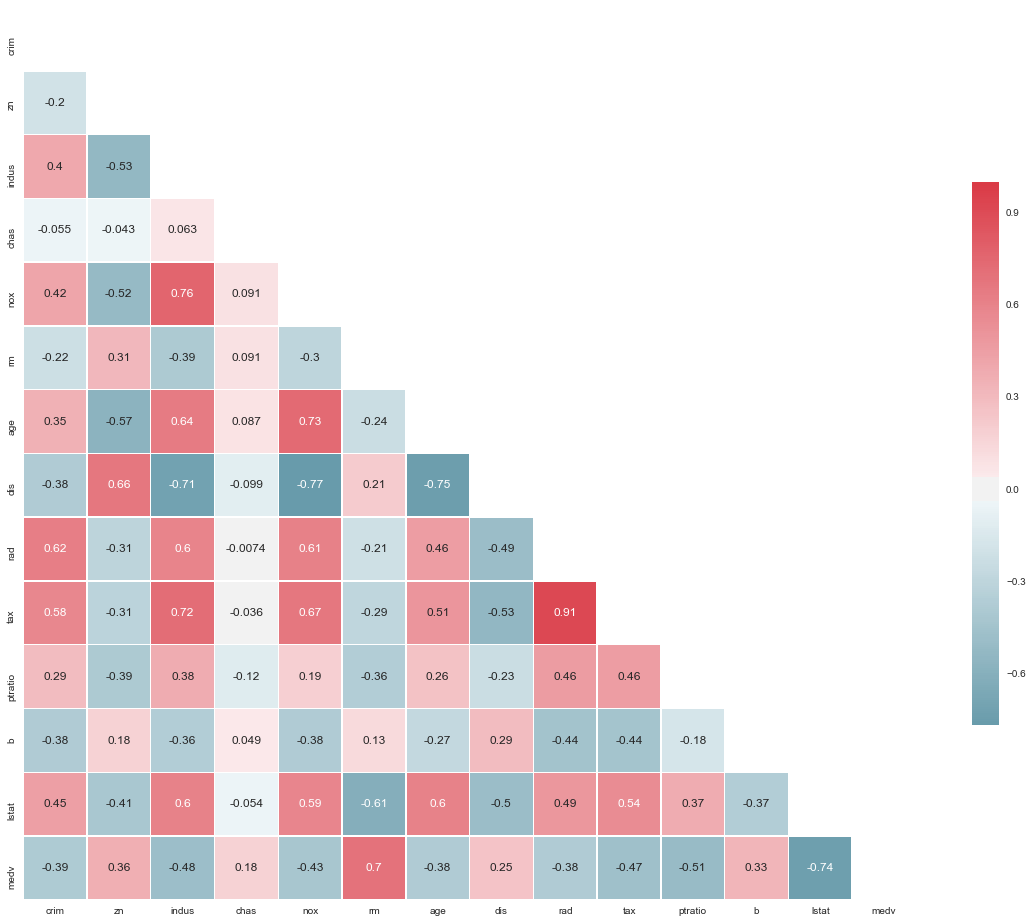

In [14]:
sns.set(style="white")

# Compute the correlation matrix
corr = boston_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Scatter Plots

In [15]:
def plot_scatters(data, figsize=(20,40)):
    fig = plt.figure(figsize=figsize)
    plot = 1
    
    cols = data.columns
    
    for col in cols:
        
        ax = fig.add_subplot(data.shape[1], 3, plot)
        ax.set_title(col)
        ax.scatter(x=boston_df[col].values, y=boston_df.medv.values, color='b', alpha=0.3)

        ax.set_ylabel('Median Value', size=15)
                             
        plot += 1
    plt.subplots_adjust(wspace=0.2,hspace=.4);

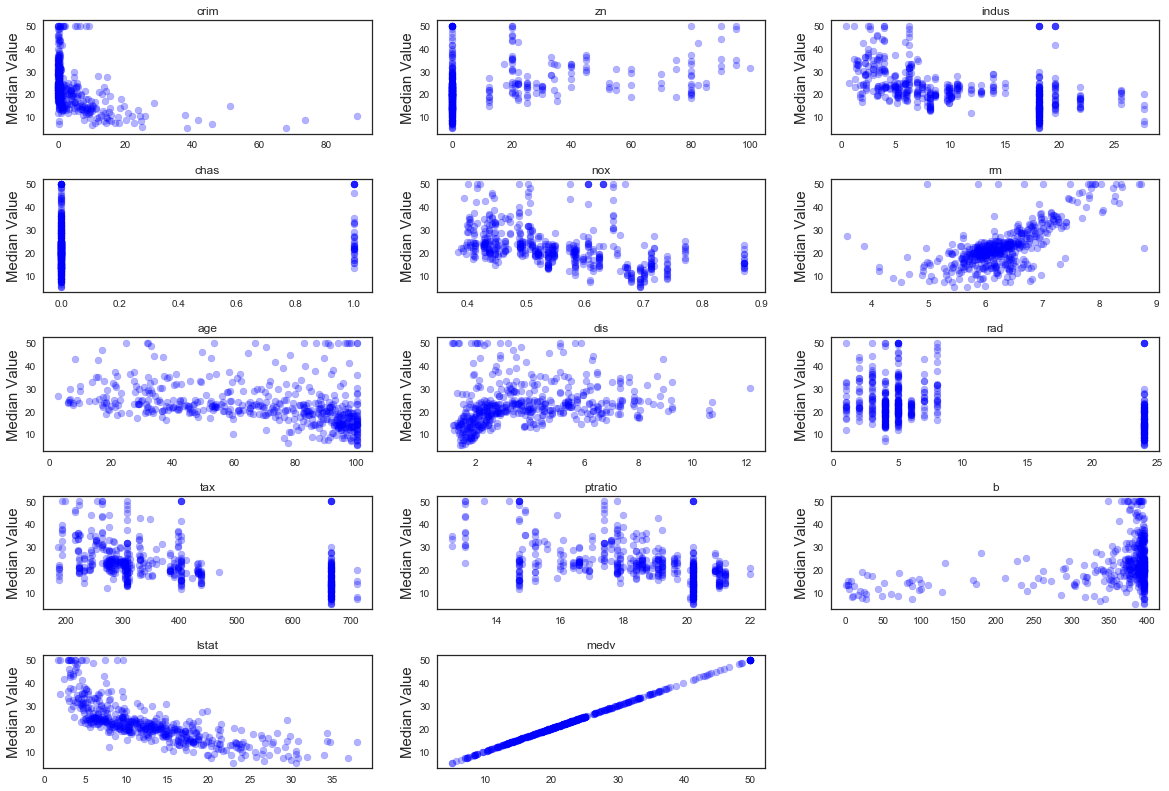

In [16]:
plot_scatters(boston_df)

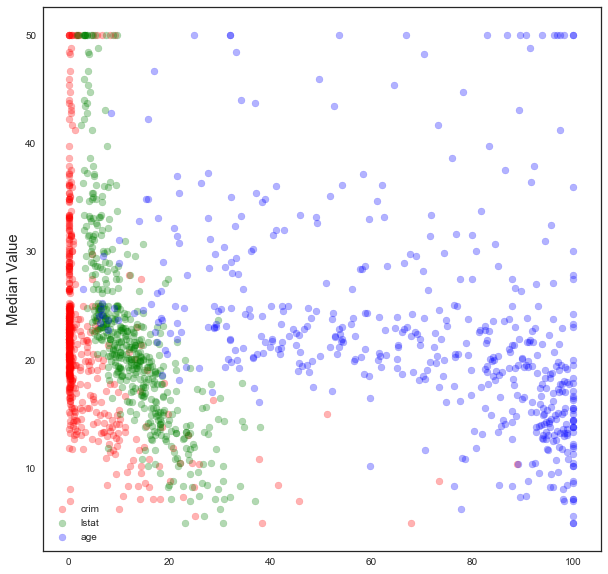

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1) #this is where the axis is set??
for feature, color in zip(['crim', 'lstat', 'age'], ['r', 'g', 'b']):
    ax.scatter(x=boston_df[feature].values, y=boston_df.medv.values, color=color, alpha=0.3, label=feature)
ax.legend(loc='best')
ax.set_ylabel('Median Value', size=15);

## Histograms

In [18]:
def plot_hists(data, alpha=0.5, figsize=(20, 40)):
    ## Plotting Histograms
    fig = plt.figure(figsize=figsize)
    plot = 1
    
    cols = data.columns
    
    for col in cols: 
        ax = fig.add_subplot(data.shape[1], 3, plot)
        ax.set_title(col)
        ax.hist(data[col], bins = 50, alpha = alpha, density=1)
        
        plot += 1
    
    plt.subplots_adjust(wspace=0.15,hspace=.4);

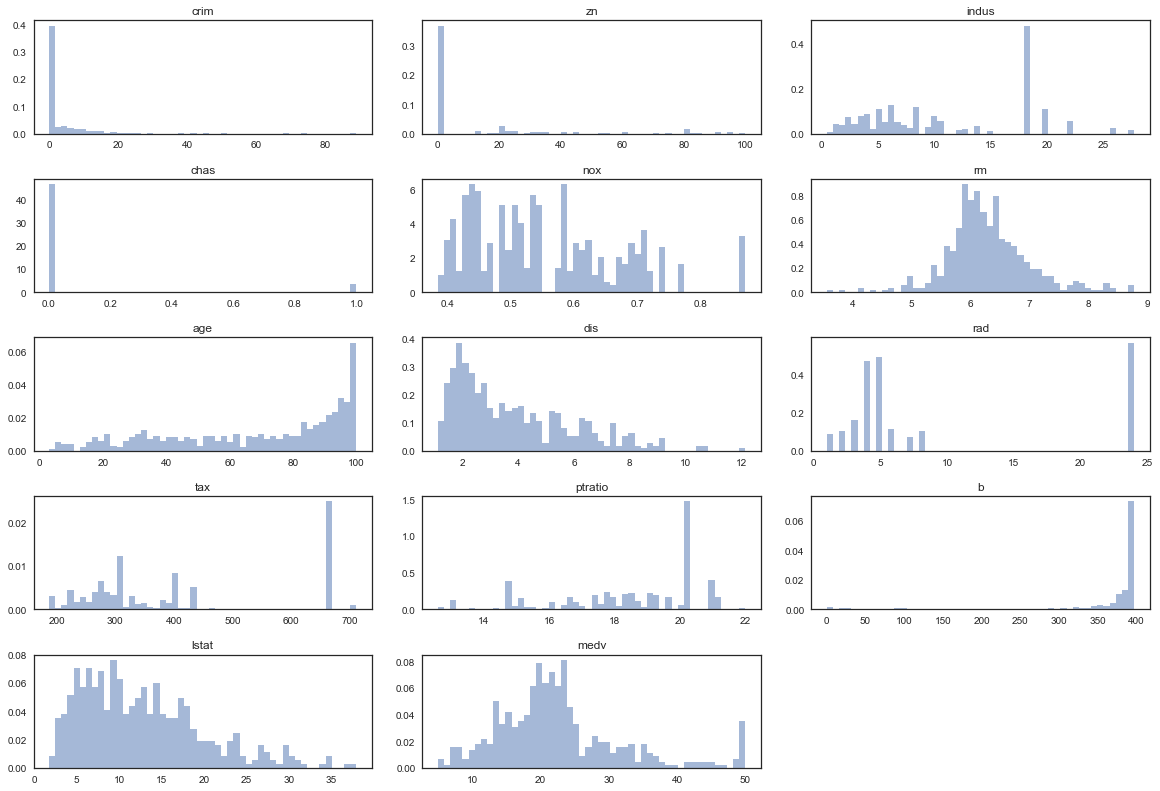

In [19]:
plot_hists(boston_df)

In [20]:
def plot_boxes(data, figsize=(20, 60)):
    ## Plotting Histograms
    fig = plt.figure(figsize=figsize)
    plot = 1
    
    cols = data.columns
    
    for col in cols: 
        ax = fig.add_subplot(data.shape[1], 3, plot)
        ax.set_title(col)
        sns.boxplot(x=data[col])
        
        plot += 1
    
    plt.subplots_adjust(wspace=0.15,hspace=.2);

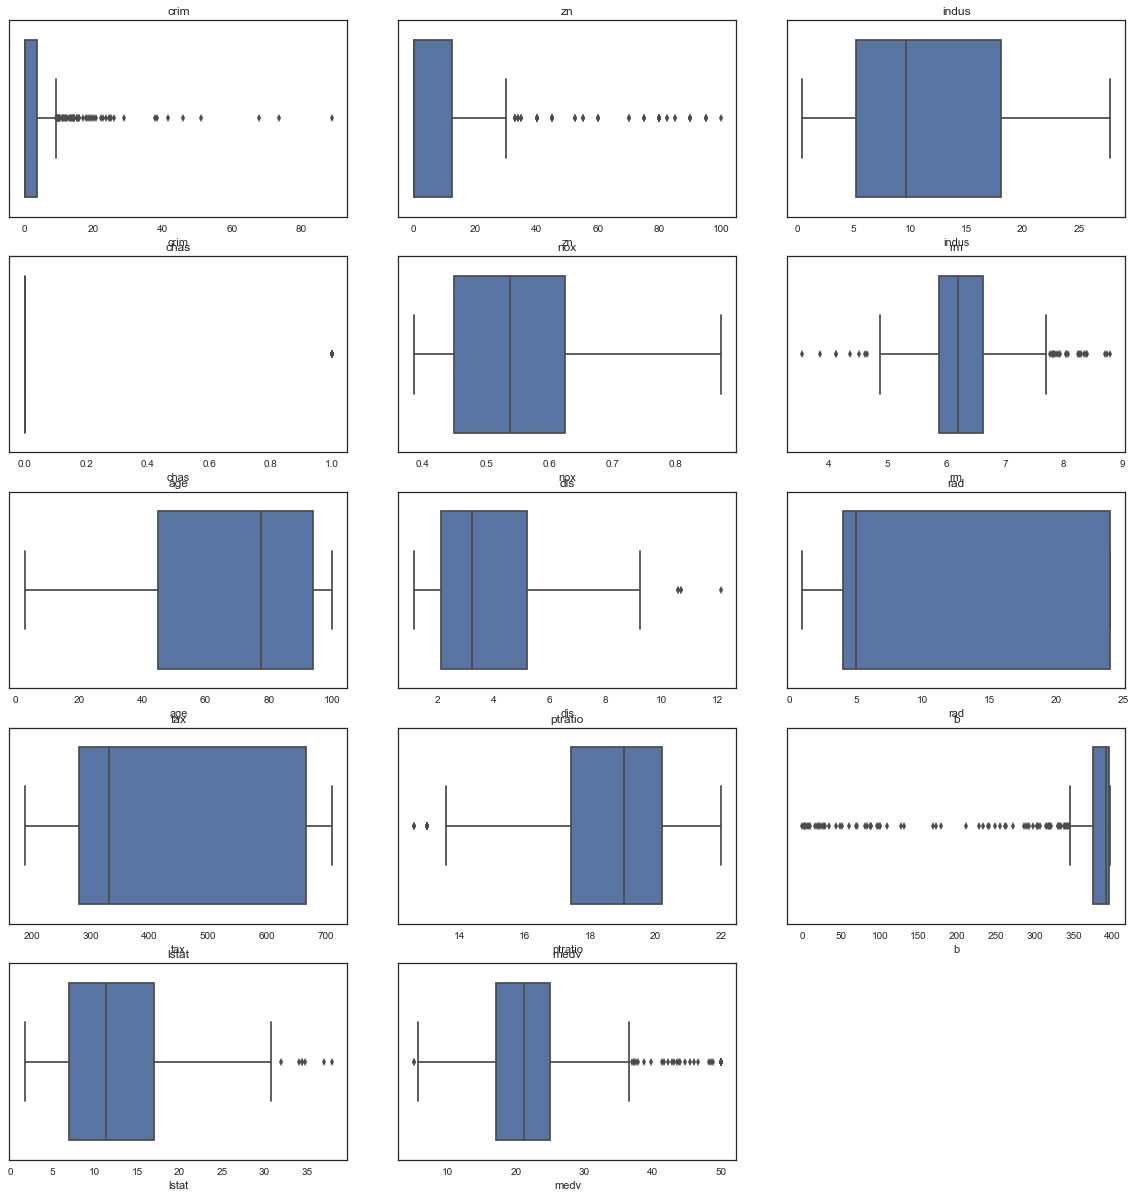

In [21]:
plot_boxes(boston_df)

## Modeling - Linear Regression
- We will be perfoming Linear Regression with the Scikit Learn's Linear Regression Class
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Prediction Features to matrix
    - by convention the data is labeled as X

In [22]:
X = boston_df.drop('medv', axis=1).values

#### Target Array
   - by convention the target is labeled as y

In [23]:
y = boston_df.medv.values

- We converted our data from pandas DataFrame to numpy arrays for modeling.  

In [24]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Quick and dirty model

In [25]:
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- we are telling the model to learn (i.e. fit) by taking the data X and its category, so when we get new data it will assign it a category based on the best correlation.

In [26]:
score = linear_model.score(X, y)
print('R-squared: {:.2f}'.format(score))

R-squared: 0.74


#### Train Test Split
- Split data into training set and a testing set with SciKit Learn's Train Test Split 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (379, 13)
y_train shape: (379,)
X_test shape: (127, 13)
y_test shape: (127,)


In [29]:
train_perc = len(X_train)/len(boston_df)
test_perc = len(X_test)/len(boston_df)

print('Train Percent: {:.2f}'.format(train_perc))
print('Test Percent: {:.2f}'.format(test_perc))

Train Percent: 0.75
Test Percent: 0.25


- By default our data is split with 75% of our overvations (rows) in the train set and 25% in the test set.  
- The rows that make it into out train or test set are selected at random.
    - 42 is just a random seed used to split our data and allow us to get the same results every time.  Left out the random_state will default to np.random and we will get a different split each tim ethis cell is run.

In [30]:
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- We created our model as if we only had our training data whick is by default 75% of our data.

In [31]:
print('Train set R-squared {:.2f}'.format(linear_model2.score(X_train, y_train)))
print('Test set R-squared {:.2f}'.format(linear_model2.score(X_test, y_test)))

Train set R-squared 0.75
Test set R-squared 0.68


- The R-squared value for our train set is higher than out test set.  This makes sense because we would expect a model created on data to fit that data better than unseen data.
- Our R-squared has gone up, slightly, from our quick model (above) this is because the data in our train set is easier to fit a line to than the entire dataset. 
- Our **test error is more important than train error** because this shows how the model would perform on unseen data. 

### Model Tuning and Cross Validation

#### Cross Validation
- Not that 
- Let's now create our model using cross validation using SciKit Learn's KFolds Class
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [32]:
folds = []
for i in range(5):
    cv_list = ['   train   ', '   train   ', '   train   ', '   train   ', '   train   ']
    cv_list[i] = 'validation '
    folds.append(cv_list)
folds

[['validation ', '   train   ', '   train   ', '   train   ', '   train   '],
 ['   train   ', 'validation ', '   train   ', '   train   ', '   train   '],
 ['   train   ', '   train   ', 'validation ', '   train   ', '   train   '],
 ['   train   ', '   train   ', '   train   ', 'validation ', '   train   '],
 ['   train   ', '   train   ', '   train   ', '   train   ', 'validation ']]

In [33]:
linear_model3 = LinearRegression()
cv_scores = cross_val_score(estimator=linear_model3, X=X_train, y=y_train, 
                            cv=5, scoring='r2', verbose=0)

for i in range(len(cv_scores)):
    print('Fold {} R-squared: {:.4f}'.format(i+1, cv_scores[i]))
print('Ave R-squared: {:.4f}'.format(np.mean(cv_scores)))

Fold 1 R-squared: 0.7352
Fold 2 R-squared: 0.6415
Fold 3 R-squared: 0.7642
Fold 4 R-squared: 0.7749
Fold 5 R-squared: 0.6628
Ave R-squared: 0.7157


In [34]:
cv_scores = cross_val_score(estimator=linear_model3, X=X_train, y=y_train, 
                            cv=5, scoring='neg_mean_squared_error', verbose=0)
for i in range(len(cv_scores)):
    print('Fold {} RMSE: ${:.0f}'.format(i+1, np.sqrt(-cv_scores[i])*1000))
print('Ave RMSE: ${:.0f}'.format(np.mean(np.sqrt(-cv_scores)*1000)))

Fold 1 RMSE: $4760
Fold 2 RMSE: $5657
Fold 3 RMSE: $4968
Fold 4 RMSE: $4504
Fold 5 RMSE: $4882
Ave RMSE: $4954


## Predictions and Test Set Scoring

In [35]:
linear_model4 = LinearRegression()
linear_model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_hat = linear_model4.predict(X_test)

In [37]:
model_rmse = np.sqrt(mse(y_hat, y_test))
model_r2 = r2(y_hat, y_test)

print('RMSE: {:.4f}'.format(model_rmse))
print('R-squared: {:.4f}'.format(model_r2))

RMSE: 4.7044
R-squared: 0.6588


## Residuals Plot

In [38]:
def residual_plot(ax, x, y, y_hat, n_bins=50):
    residuals = y - y_hat
    ax.axhline(0, color="black", linestyle="--")
    ax.scatter(x, residuals, color="grey", alpha=0.5)
    ax.set_ylabel("Residuals ($y - \hat y$)")

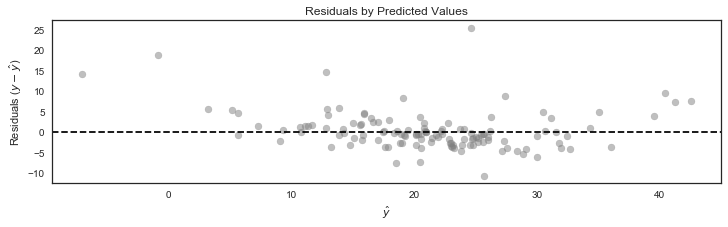

In [39]:
fig, ax = plt.subplots(figsize=(12, 3))
residual_plot(ax, y_hat, y_test, y_hat)
ax.set_title("Residuals by Predicted Values")
ax.set_xlabel("$\hat y$");

In [40]:
y_hat_full = linear_model.predict(X)

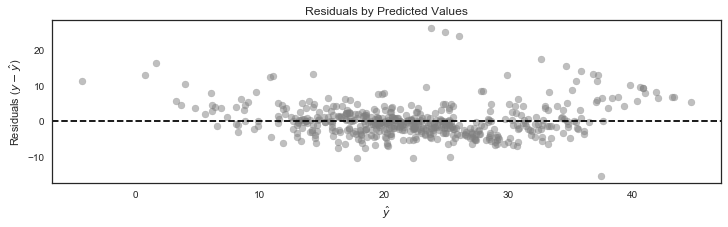

In [41]:
fig, ax = plt.subplots(figsize=(12, 3))
residual_plot(ax, y_hat_full, boston_df['medv'], y_hat_full)
ax.set_title("Residuals by Predicted Values")
ax.set_xlabel("$\hat y$");

## Feature Importances

In [42]:
features = boston_df.columns[:-1]
feature_importances = linear_model4.coef_
feature_imp_abs = np.absolute(feature_importances)

In [43]:
features = zip(features, feature_imp_abs)
feat_dict = dict()
for i in features:
    feat_dict[i[0]] = i[1]

In [44]:
feat_dict

{'crim': 0.12782491207851818,
 'zn': 0.029520897747660632,
 'indus': 0.049264310524455845,
 'chas': 2.7759443878213133,
 'nox': 16.28019620397356,
 'rm': 4.360895962217343,
 'age': 0.00919111559486489,
 'dis': 1.4017201917441253,
 'rad': 0.2574589560860004,
 'tax': 0.009947057771439909,
 'ptratio': 0.9242664028572306,
 'b': 0.013316421544324568,
 'lstat': 0.5185656343893987}

In [45]:
feature_import_df = pd.DataFrame.from_dict(feat_dict, orient='index', columns=['Feature_Importance']).sort_values(by='Feature_Importance')

In [46]:
feature_import_df

,Feature_Importance
age,0.009191
tax,0.009947
b,0.013316
zn,0.029521
indus,0.049264
crim,0.127825
rad,0.257459
lstat,0.518566
ptratio,0.924266
dis,1.401720


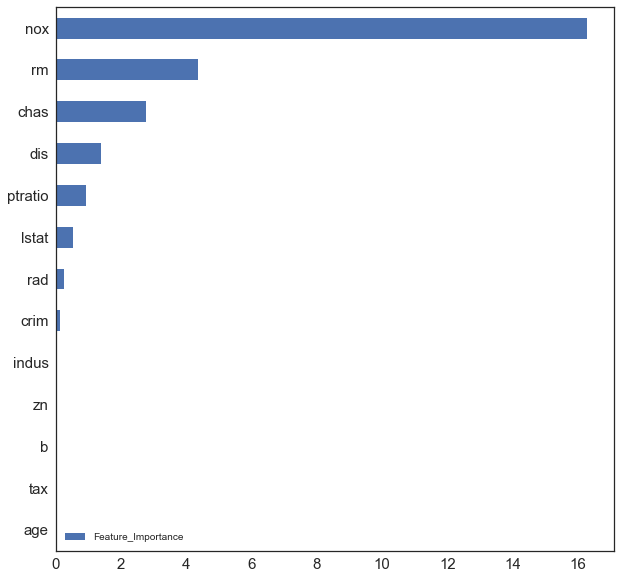

In [47]:
feature_import_df.plot(kind='barh', fontsize=15, figsize=(10, 10));

## Remove Capped data

In [48]:
boston_df['medv'].max()

50.0

In [55]:
non_max = boston_df[boston_df['medv'] != boston_df['medv'].max()]
non_max.shape

(490, 14)

In [50]:
X = non_max.drop('medv', axis=1).values
y = non_max.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
linear_model5 = LinearRegression()
linear_model5.fit(X, y)
# linear_model5.fit(X_train, y_train)
y_hat = linear_model5.predict(X)
# y_hat = linear_model5.predict(X_test)

In [52]:
cv_scores = cross_val_score(estimator=linear_model5, X=X_train, y=y_train, 
                            cv=5, scoring='neg_mean_squared_error', verbose=0)
for i in range(len(cv_scores)):
    print('Fold {} RMSE: ${:.0f}'.format(i+1, np.sqrt(-cv_scores[i])*1000))
print('Ave RMSE: ${:.0f}'.format(np.mean(np.sqrt(-cv_scores)*1000)))

Fold 1 RMSE: $1212
Fold 2 RMSE: $1128
Fold 3 RMSE: $1023
Fold 4 RMSE: $1092
Fold 5 RMSE: $930
Ave RMSE: $1077


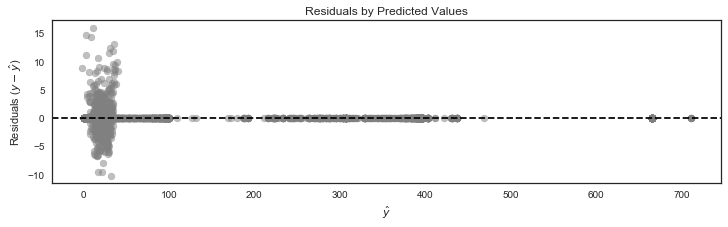

In [53]:
fig, ax = plt.subplots(figsize=(12, 3))
residual_plot(ax, y_hat, y, y_hat)
ax.set_title("Residuals by Predicted Values")
ax.set_xlabel("$\hat y$");